In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

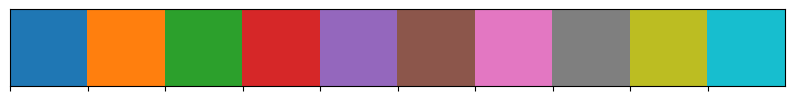

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

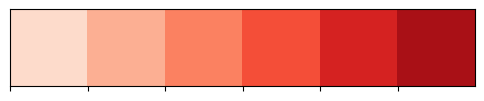

In [3]:
sns.palplot(sns.color_palette("Reds"))

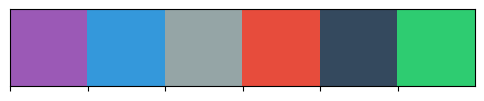

In [4]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

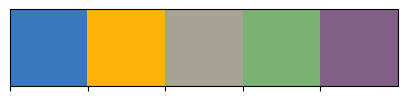

In [5]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

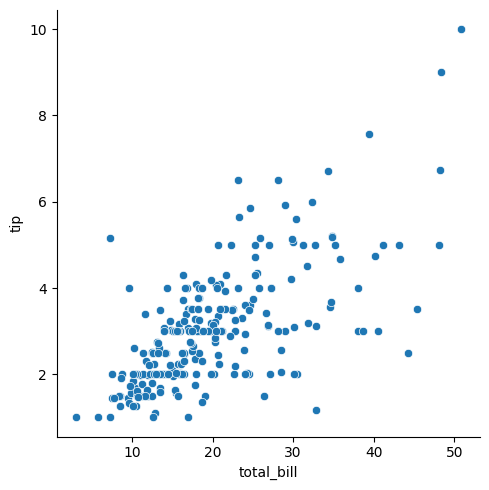

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [6]:
# 두 변수 사이의 관계 표현
tips = sns.load_dataset("tips")
tips
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()
tips[["total_bill", "tip"]].corr()

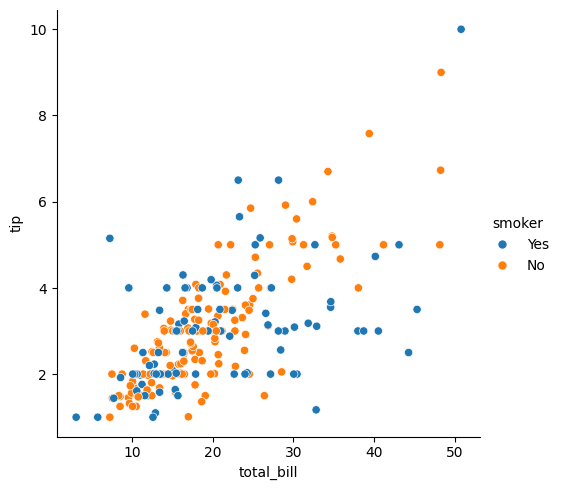

            total_bill       tip
total_bill    1.000000  0.488218
tip           0.488218  1.000000
            total_bill       tip
total_bill    1.000000  0.822183
tip           0.822183  1.000000


In [7]:
# 범주형 변수와 시각화 특성 바인딩
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

print( tips[tips["smoker"] == "Yes"][["total_bill", "tip"]].corr() )
print( tips[tips["smoker"] == "No"][["total_bill", "tip"]].corr() )

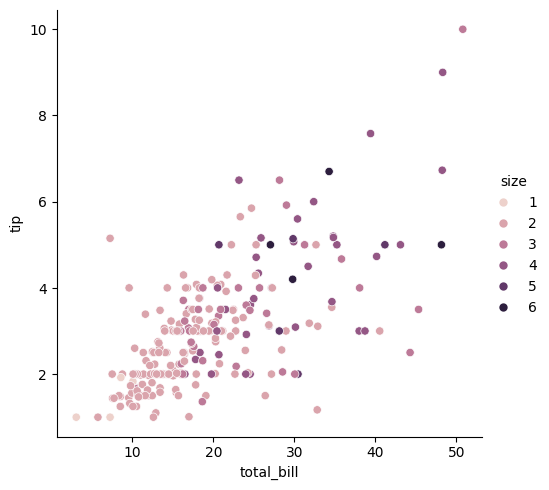

In [8]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.show()


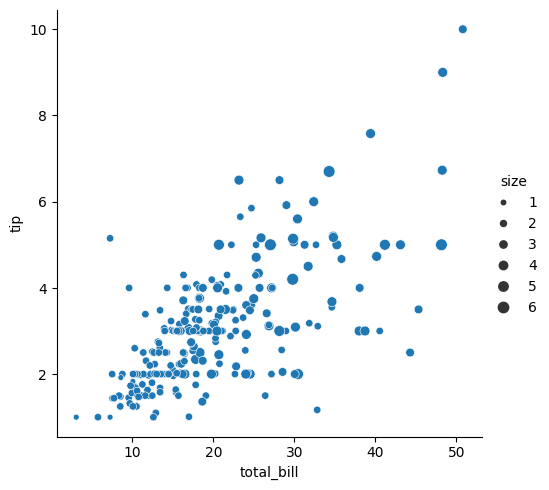

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


In [9]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
plt.show()

tips[["tip", "size"]].corr()

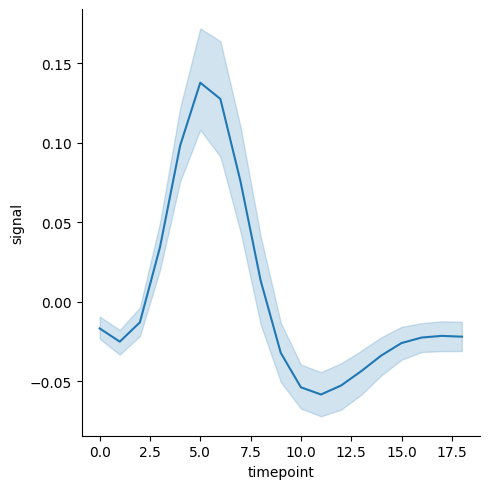

In [10]:
# 두 변수 사이의 관계
# 불확실성 표시
fmri = sns.load_dataset("fmri")
fmri
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, )
plt.show()

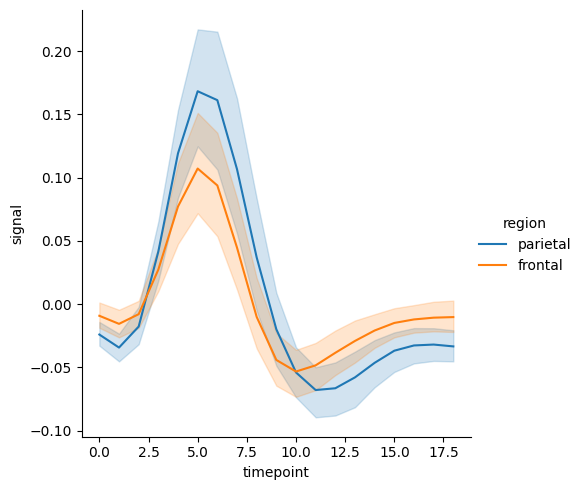

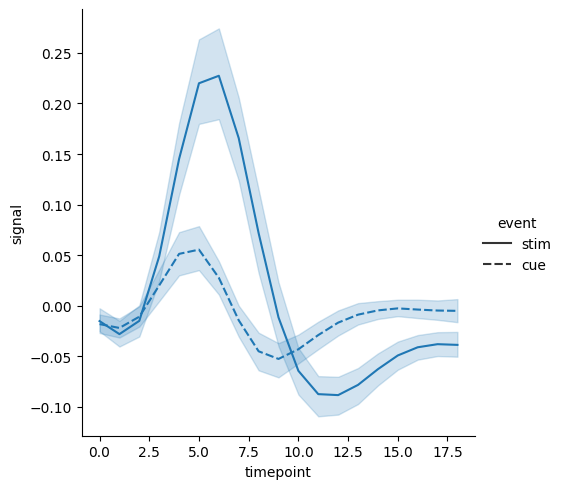

In [11]:
# 데이터와 시각화 특성 바인딩
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri)
sns.relplot(x="timepoint", y="signal", style="event", kind="line", data=fmri)
plt.show()

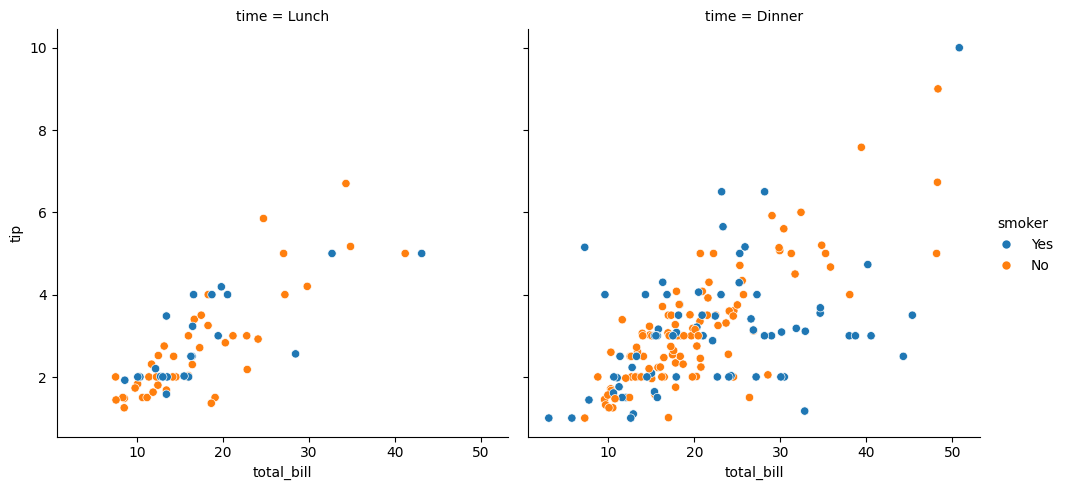

In [12]:
# 컬럼에 비교할 분류 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

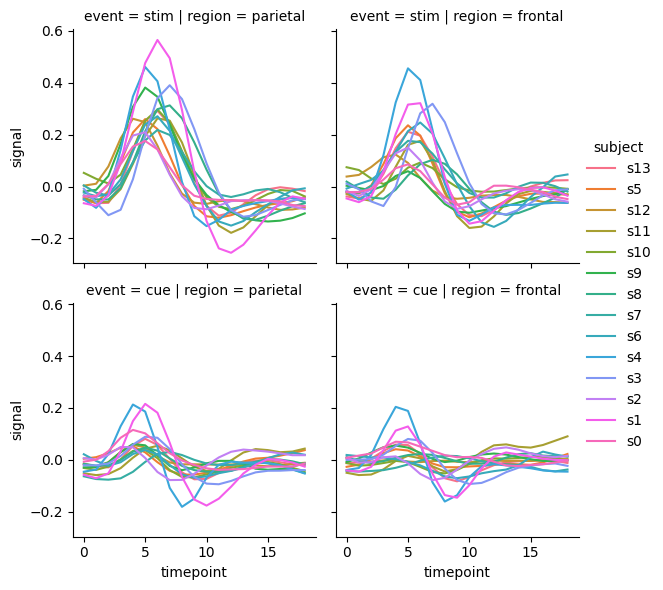

In [13]:
# 행과 열에 비교할 분류 바인딩
sns.relplot(x="timepoint", y="signal", hue="subject", 
            col="region", row="event", height=3, 
            kind="line", data=fmri)
plt.show()

In [14]:
fmri.query("region == 'frontal'") # == fmri[fmri["region"] == 'frontal']

,subject,timepoint,event,region,signal
67,s0,0,stim,frontal,-0.021452
170,s2,6,stim,frontal,0.101050
267,s10,4,stim,frontal,0.030044
268,s11,4,stim,frontal,0.075957
269,s3,0,stim,frontal,0.011056
...,...,...,...,...,...
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939


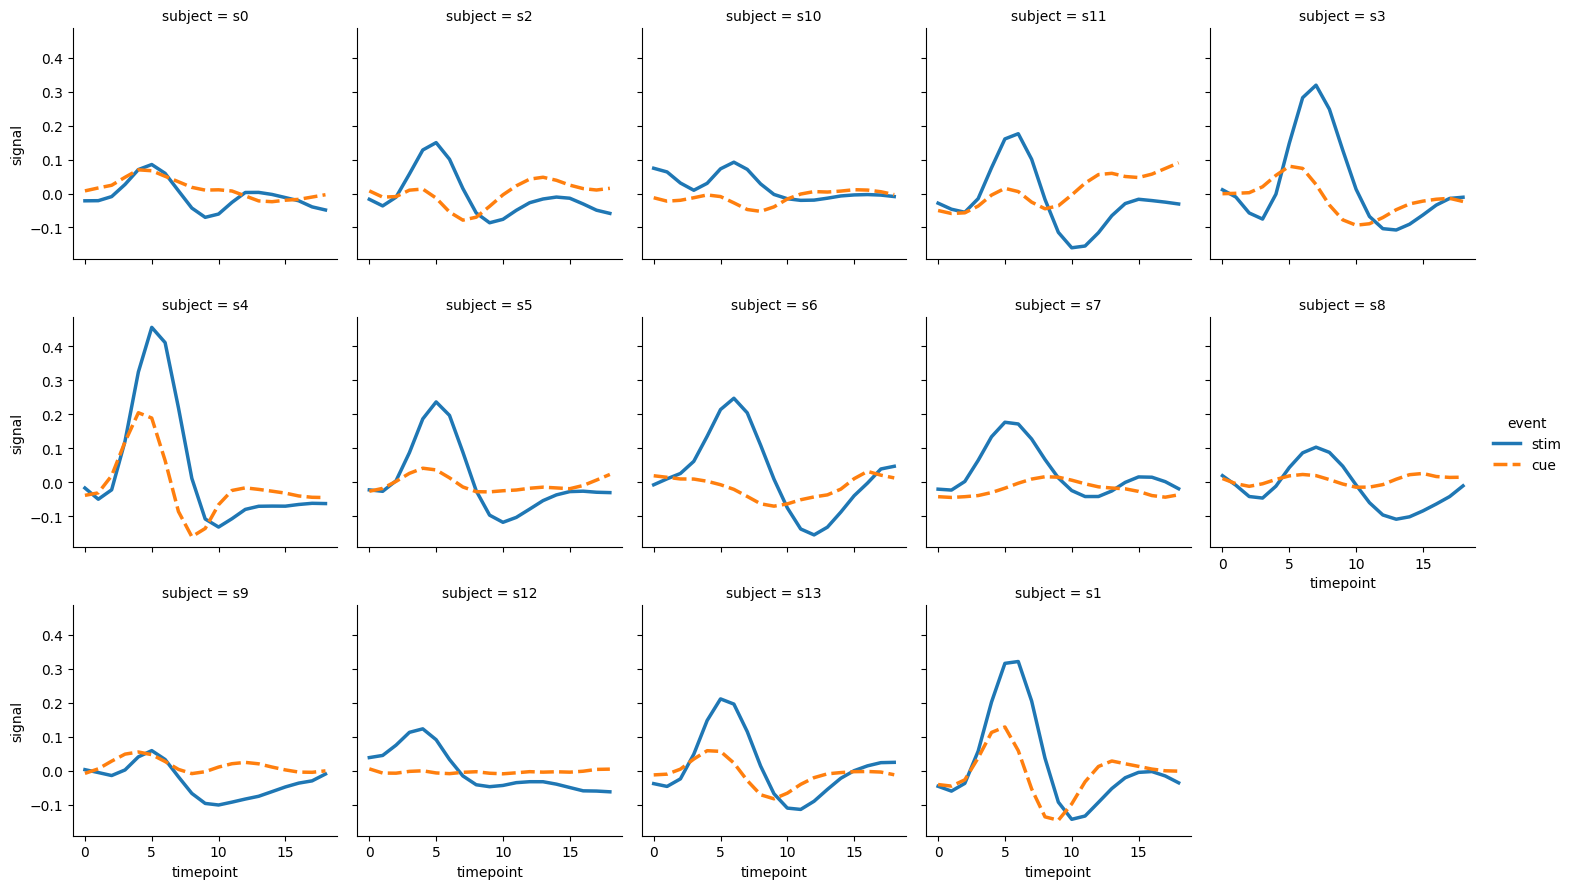

In [15]:
# 비교할 분류가 많은 경우 한 행에 표시할 최대 플롯 개수 지정 : wrap
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5, height=3, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))
plt.show()

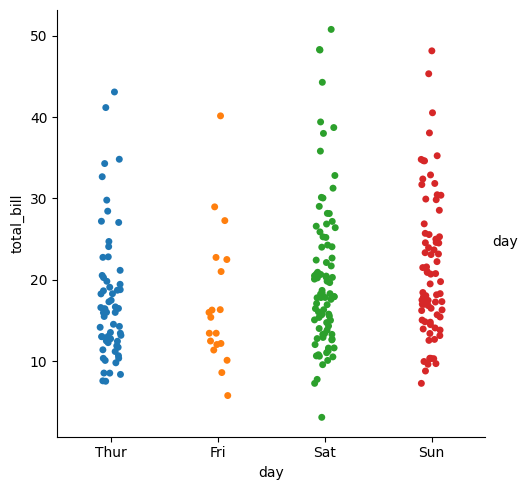

In [16]:
# 기본 범주 데이터 산점도 그래프
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", hue="day", data=tips, jitter=True); # jitter : easing overplotting
plt.show()

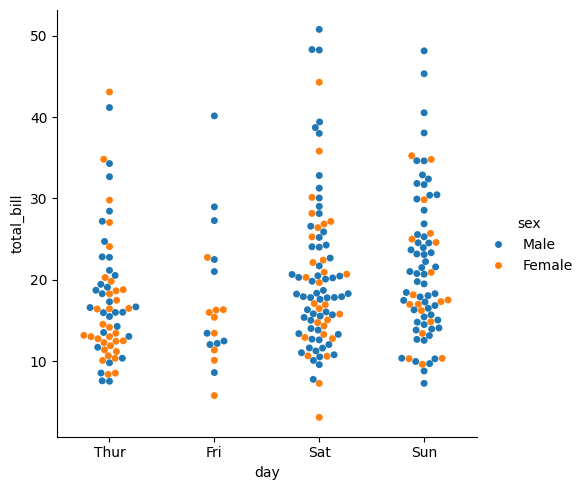

In [17]:
# 
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); # kind="swarm" : easing overplotting
plt.show()

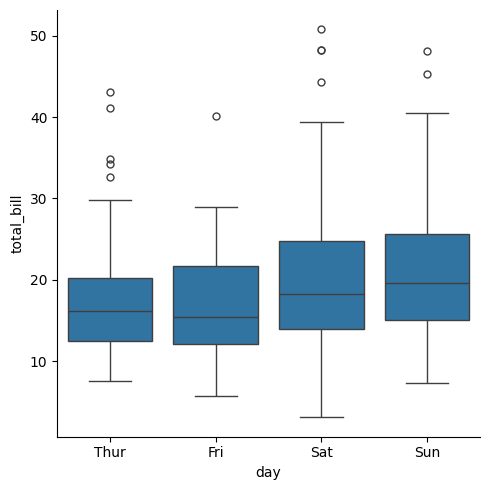

In [18]:
# 기본 박스 플롯
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

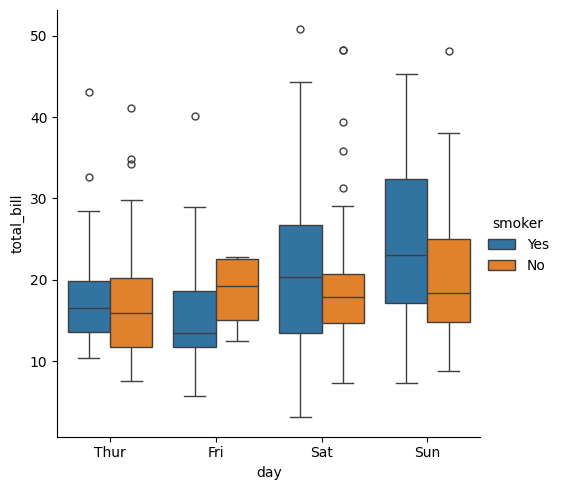

In [19]:
# 데이터와 시각화 요소 바인딩
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

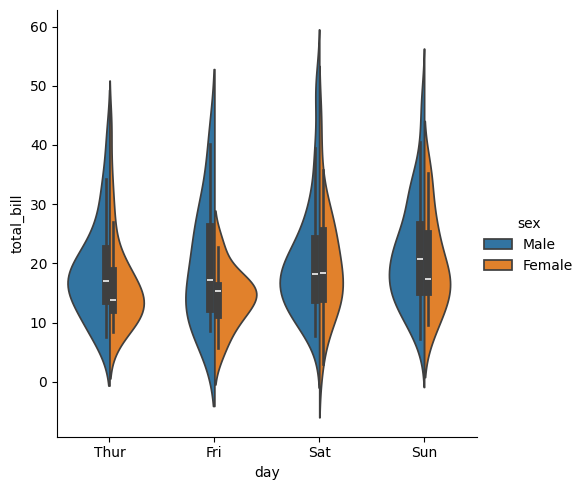

In [20]:
# 단일 바이올린 플롯
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
# sns.catplot(x="day", y="total_bill", kind="violin", split=True, data=tips)
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

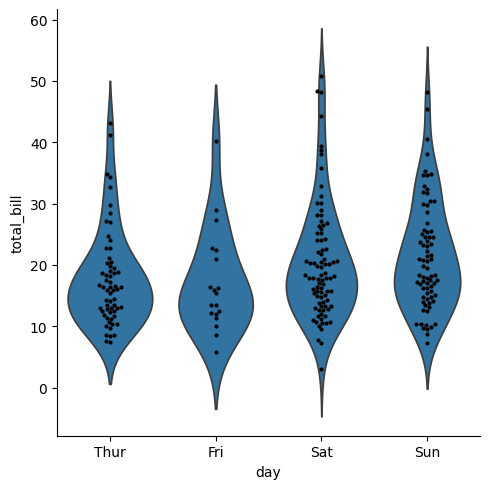

In [21]:
# 바이올린플롯과 범주데이터 산점도 그래프 병합
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

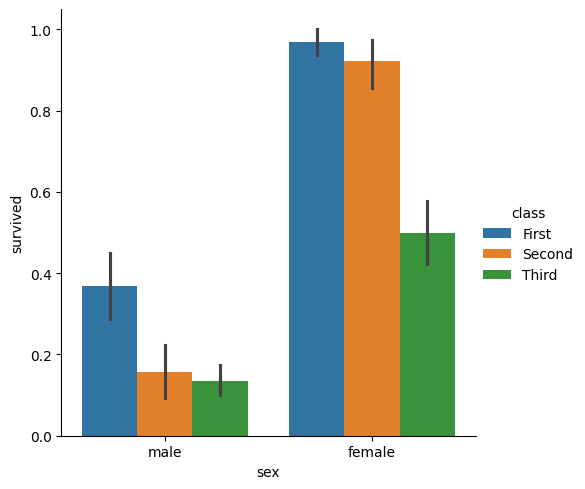

In [26]:
#Bar plot
titanic = sns.load_dataset("titanic")
titanic
# sns.catplot(x="sex", y="survived", kind="bar", data=titanic)
# sns.catplot(x="class", y="survived", kind="bar", data=titanic)
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);
plt.show()

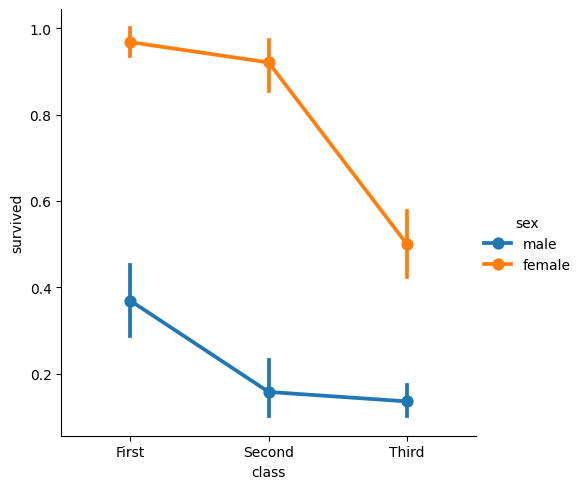

In [27]:
# Point plots
sns.catplot(x="class", y="survived", hue="sex",
            # palette={"male": "g", "female": "m"},
            # markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

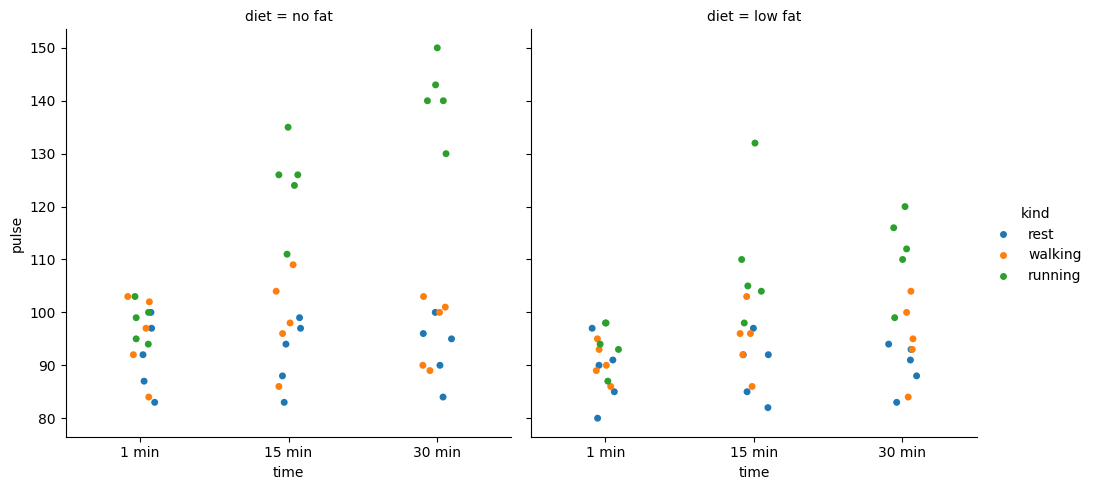

In [30]:
exercise = sns.load_dataset("exercise")
exercise
exercise["time"].value_counts()
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)

In [32]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
titanic[titanic.deck.notnull()]["alive"].value_counts()

alive
yes    136
no      67
Name: count, dtype: int64

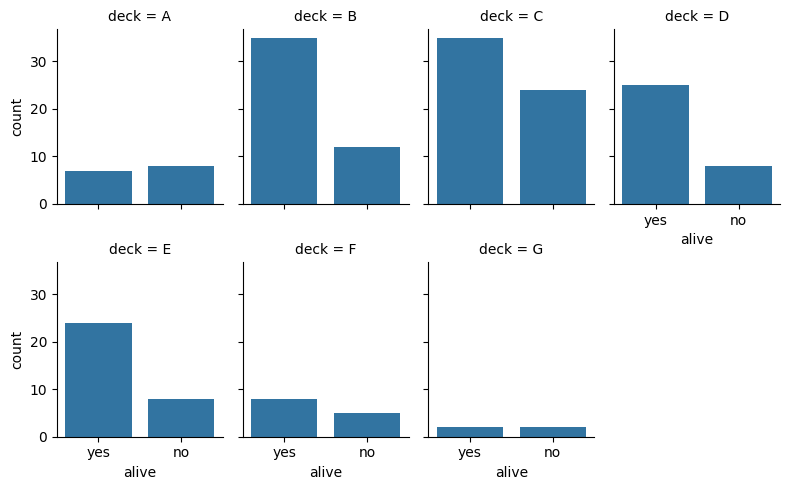

In [34]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()], kind="count", height=2.5, aspect=.8, )
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11928\686023517.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20, kde=True, rug=True); # kde : kernel density estimation


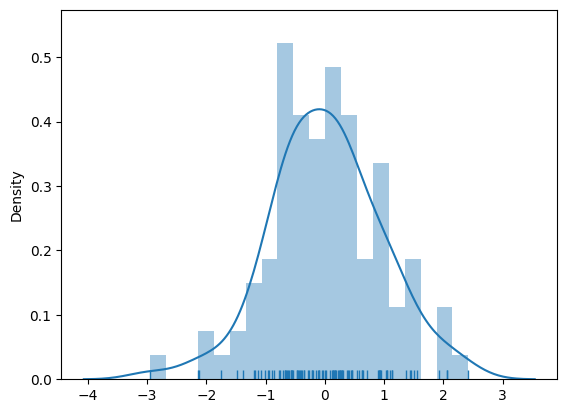

In [38]:
# 일변량 분포 시각화
x = np.random.normal(size=100)
sns.distplot(x, bins=20, kde=True, rug=True); # kde : kernel density estimation
plt.show()

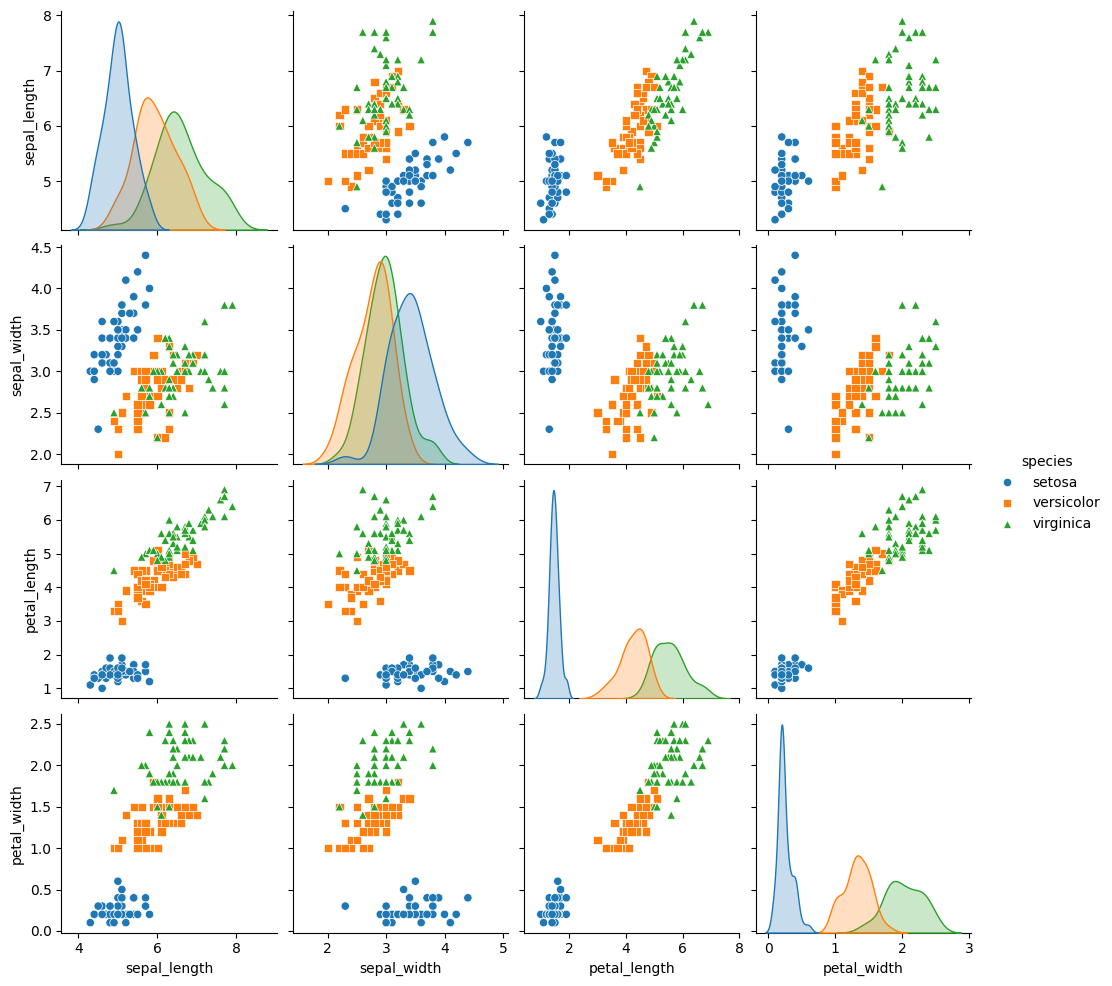

In [39]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", markers=["o", "s", "^"]) # markers는 hue를지정했을 경우에만 사용 가능하며 hue에 지정된 컬럼의 데이터 범주의 개수와 일치
plt.show()

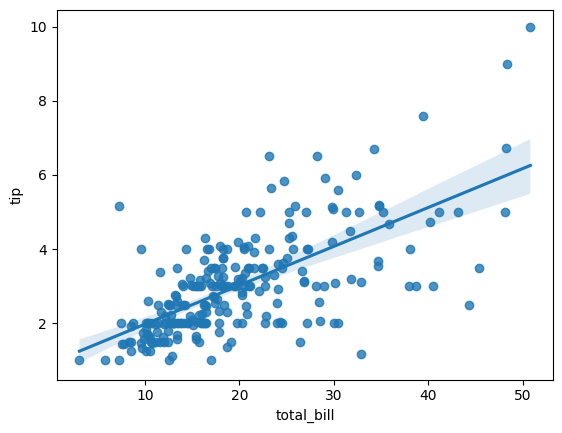

In [40]:
# 선형 관계 시각화
sns.regplot(x="total_bill", y="tip", data=tips);

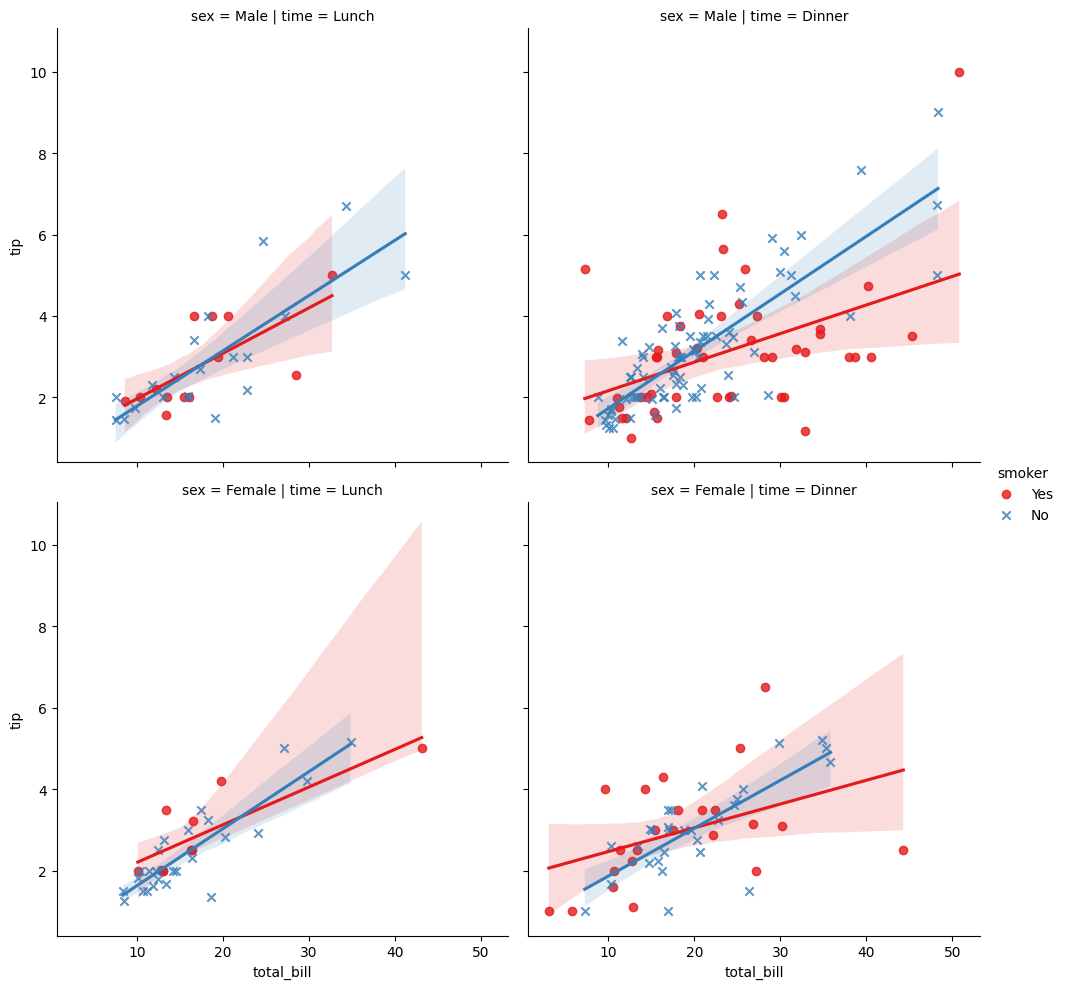

In [41]:
# 데이터와 시각화 속성 매핑
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1", col="time", row="sex")

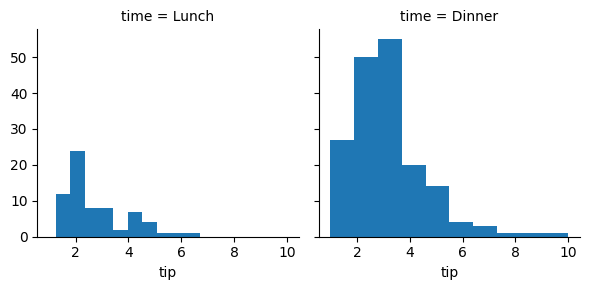

In [46]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

g.map(plt.hist, "tip")
plt.show()

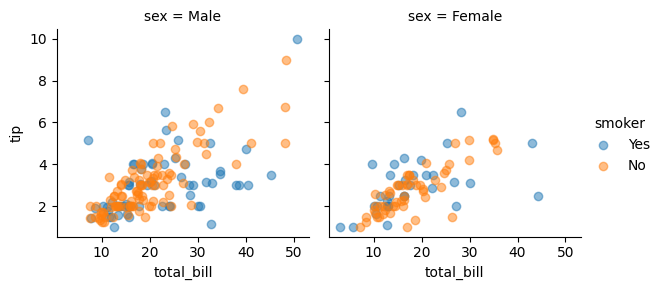

In [51]:
# 데이터와 시각화 속성 매핑
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.5)
g.add_legend()
plt.show()